## Disney Movies Total Gross dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In This project, I investigate a dataset of Disney movies.\
This dataset contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross.\
\
I will work on the data to answer the next questions:
1. Top 10 movies at the box office?
2. Movie genre trend:
>From the top 10 movies above, it seems that some genres are more popular than others. So, we will check which genres are growing stronger in popularity.
3. Visualize the genre popularity trend:
>make a plot out of these means of groups to better see how box office revenues have changed over time.
4. Should Disney make more action and adventure movies?

#### Import the necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Importing the data into DataFrame and show investigate the first rows.
mov = pd.read_csv('disney_movies_total_gross.csv')
mov.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [3]:
# Full view on the DataFrame about the number of the rows, columns, non-null values, and the type of the data.
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [4]:
# Generate descriptive statistics from the DataFrame.
mov.describe()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
count,579,579,562,523,579,579
unique,573,553,12,5,576,576
top,The Jungle Book,"Dec 25, 1997",Comedy,PG,$0,$0
freq,3,3,182,187,4,4


In [5]:
# Check the duplicated values.
mov.duplicated().sum()

0

### Observations:
1. genre column and MPAA_rating column have NaN values.
2. Type of release_date, total_gross, inflation_adjusted_gross columns are object, But:
> - release_date must be Datetime.
> - total_gross and inflation_adjusted_gross must be int.
3. There are no duplicate values.

<a id='cleaning'></a>
## Data Cleaning

### 1. genre column and MPAA_rating column have NaN values.

In [6]:
mov.genre.isnull().sum()

17

In [7]:
mov.MPAA_rating.isnull().sum()

56

In [8]:
# Fill the NaN values in the genre column with the median.
mov.genre.fillna(mov.genre.median, inplace = True)

# Fill the NaN values in MPAA_rating column with the median.
mov.MPAA_rating.fillna(mov.MPAA_rating.median, inplace = True)

In [9]:
# Check the information of the DataFrame after getting rid of NaN.
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     579 non-null    object
 3   MPAA_rating               579 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


### 2. Convert the type of release_date, total_gross, and inflation_adjusted_gross columns.

In [10]:
# Convert the type of release_data column to datetime.
mov.release_date = pd.to_datetime(mov.release_date)

In [11]:
# Convert the type of total_gross and inflation_adjusted_gross columns to int.
mov.total_gross = mov.total_gross.replace({'\$': '', ',': ''}, regex = True)
mov.total_gross = mov.total_gross.astype(int)

mov.inflation_adjusted_gross = mov.inflation_adjusted_gross.replace({'\$': '', ',': ''}, regex = True).astype(int)

In [12]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     579 non-null    object        
 3   MPAA_rating               579 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


In [13]:
mov.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Top 10 movies at the box office?

In [14]:
# Find the movie with the top gross.
top_10_gross = mov.total_gross.nlargest(10)
top_10_gross

564    936662225
524    623279547
578    529483936
571    486295561
558    459005868
441    423315812
179    422780140
499    415004880
532    408992272
569    408084349
Name: total_gross, dtype: int64

In [15]:
# Creata a dic, then, store the name of the top 10 with his total gross in the dic.
top10_titles = {}
for total in top_10_gross:
    top_title = mov['movie_title'][mov.total_gross == total]
#     titles.update({total: top_title.to_string()})
    top10_titles[total] = top_title.to_string()

# Display the names wiht the index labedl.
top10_titles

{936662225: '564    Star Wars Ep. VII: The Force Awakens',
 623279547: '524    The Avengers',
 529483936: '578    Rogue One: A Star Wars Story',
 486295561: '571    Finding Dory',
 459005868: '558    Avengers: Age of Ultron',
 423315812: '441    Pirates of the Caribbean: Dead Man’…',
 422780140: '179    The Lion King',
 415004880: '499    Toy Story 3',
 408992272: '532    Iron Man 3',
 408084349: '569    Captain America: Civil War'}

### 2. Movie genre trend:

In [16]:
# Display the gener of the top 10 movies.
top_genres = {}
for total in top_10_gross:
    top_title = mov['genre'][mov.total_gross == total]
    top_genres[total] = top_title.to_string()

# Display the names wiht the index labedl.
top_genres

{936662225: '564    Adventure',
 623279547: '524    Action',
 529483936: '578    Adventure',
 486295561: '571    Adventure',
 459005868: '558    Action',
 423315812: '441    Adventure',
 422780140: '179    Adventure',
 415004880: '499    Adventure',
 408992272: '532    Action',
 408084349: '569    Action'}

>There are **two** genres that are more popular than others in the top 10 movies in the Box office, **"Adventure"** and **"Action"**. And The two genres close together, Adventure outperforms Action by just one movie.

In [17]:
n_genres = mov['genre'].value_counts()
len(n_genres)

13

In [18]:
n_genres

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "/home/ahmed-fathi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 1786, in __hash__
    f"{repr(type(self).__name__)} objects are mutable, "
TypeError: 'Series' objects are mutable, thus they cannot be hashed


Comedy                                                                                                                                                                                                                                                                                                             182
Adventure                                                                                                                                                                                                                                                                                                          129
Drama                                                                                                                                                                                                                                                                                                              114
Action                                                             

In [19]:
# # Make visualize for all genre.
# fig, ax = plt.subplots()
# ax.scatter(mov['total_gross'], mov[''])
# ax.set_title('The box office revenues over the time')
# ax.set_xlabel('The Date')
# ax.set_ylabel('The revenue')

### 3. Visualize the genre popularity trend:

Text(0, 0.5, 'The revenue')

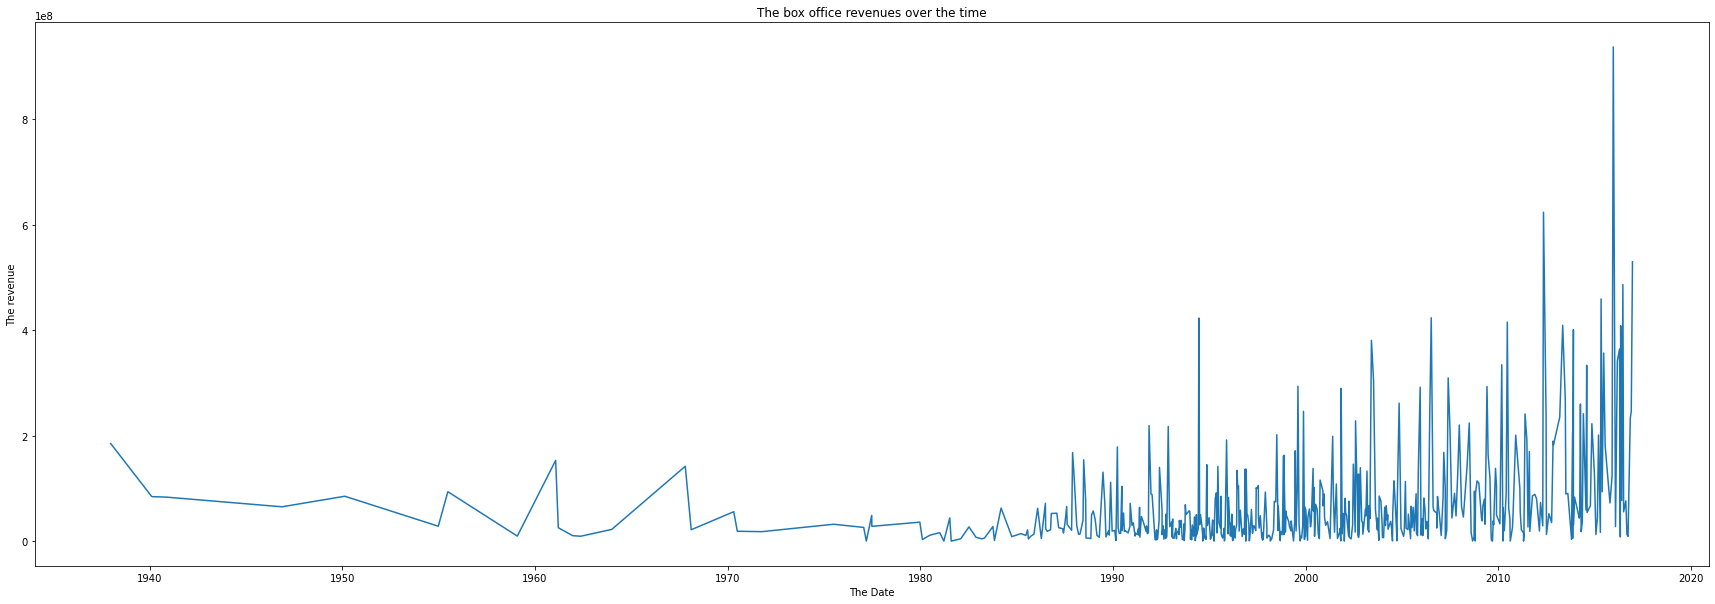

In [20]:
# Make visualize for all genre.
fig, ax = plt.subplots(figsize=(30, 10) )
ax.plot(mov['release_date'], mov['total_gross'])
ax.set_title('The box office revenues over the time')
ax.set_xlabel('The Date')
ax.set_ylabel('The revenue')

### 4. Should Disney make more action and adventure movies?

In [21]:
# calculate the revenue of all genres.
all_revenues = mov['total_gross'].sum()
all_revenues

37462335553

In [22]:
# calculate the revenue of Adventure genre.
adventure_revenue = sum(mov['total_gross'][mov['genre'] == 'Adventure'])
adventure_revenue

16389069453

In [23]:
# calculate the revenue of Action genre.
action_revenue = sum(mov['total_gross'][mov['genre'] == 'Action'])
action_revenue

4184563282

In [24]:
# Show the percentage of the Action and Adventu
action_adventure_revenues = adventure_revenue + action_revenue
print(f"The percentage of Action and Adventure movies from the total gross= {(action_adventure_revenues / all_revenues) * 100}%.")
print(f"The number of genre for the DataFram is {len(n_genres)} genres.")

The percentage of Action and Adventure movies from the total gross= 54.91817963643341%.
The number of genre for the DataFram is 13 genres.


>From the percentage, We see the **Action** and **Adventure** movies are the two genres of movies their revenues represent **more than 50% of the total** revenues of the all genres. So, Disen should make more Action and Adventure movies.